# Tutorial for TermExtractor
This tutorial describes the main steps and options for the usage of TermExtractor as part of the BioTermCategorizer library.

### Importing the library
In order to import the library and all its functions, the following code should be executed

In [1]:
import sys, os, re

#set the path to the library
general_path = os.getcwd().split("BioTermCategorizer")[0]+"BioTermCategorizer/"
sys.path.append(general_path+'biotermcategorizer/')
general_path

'/mnt/c/Users/Sergi/Documents/BioTermCategorizer/'

Additionally, the main class `TermExtractor` must be imported

In [2]:
from TermExtractor import TermExtractor

[nltk_data] Downloading package stopwords to /home/sergi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sergi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sergi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to /home/sergi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Using TermExtractor's basic functions
#### The TermExtractor object
A first instance of the class `TermExtractor` must be assigned to a variable, as shown below. The parameters that can be introduced are:
- `extraction_methods` (list): List of keyword extraction methods. Use a list even if only one extraction method is provided. Default value: `["textrank"]`.
- `categorization_method` (str): Method for text categorization. Default value: `"setfit"`.
- `language` (str): Language for text processing. Only implemented in Spanish. Default value: `"spanish"`.
- `max_tokens` (int): Maximum number of tokens for keyword extraction. Default value: `3`.
- `pos` (bool): Whether to use Part of Speech sequences in KeyBert. Default value: `False`.
- `pos_pattern` (str): The Part of Speech regex pattern. Default value: `"<NOUN.*>*<ADP.*>*<NOUN.*>*<ADJ.*>*|<PROPN.*>+|<VERB.*>+"`.
- `join` (bool): Whether to join keywords from different methods and remove overlaps among them. When `join=True`, only a list of keywords is provided for all the selected extraction methods, as opposed to when `join=False`. Default value: `False`.
- `postprocess` (bool): Whether to postprocess the extracted terms to remove and modify the ones with little meaning. Default value: `True`.
- `n` (int): Maximum number of labels for a single sample. Default value: `1`.
- `thr_setfit` (float): Threshold for SetFit classification. Default value: `0.5`.
- `thr_transformers` (float): Threshold for Transformers classification. Default value: `-1`.
- `n_clusters` (int): Number of clusters for clustering. It is required when `categorization_method="clustering"`. Default value: `None`.
- `categorizer_model_path` (str): Path to the categorizer model. Default value: `None`.
- `output_path` (str): Path to save the trained model. Default value: `"./trained_model"`.
- `clustering_model` (str): Clustering model for keyword clustering. Default value: `"cambridgeltl/SapBERT-from-PubMedBERT-fulltext"`.
- `classifier_model` (str): Classifier model for classification. Default value: `"/mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_noparents_1epoch"`.
- `**kwargs` (dict): Additional keyword arguments. Default value: `None`.

An instance of the object TermExtractor with the default parameters is shown below:

In [3]:
extractor = TermExtractor()

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Once the first instance of the extractor is created, some attributes of the `TermExtractor` object can already be presented. The following attributes can be extracted from the `TermExtractor` object through dot indexing:
- `extraction_methods` (list): List of the selected extraction methods.
- `extractors` (dict): Dictionary of the Extractor() class type objects to be used.
- `categorization_method` (str): Selected categorization method.
- `categorizer`: Instance of the SetFitClassifier, TransformersClassifier or Clustering class object.
- `join`(bool): Provided value for join as a parameter.
- `postprocess` (bool): Provided value for postprocess as a parameter.
- `kwargs` (dict): Dictionary of introduced extra parameters.
- `keywords`(list): List of Keyword() class objects including the extracted keywords. Since the extraction of the keywords has not yet been called, the attributes is `None`.

In [4]:
#attributes with the default settings
print("The default settings use the extractor", str(extractor.extraction_methods), "and the categorizer", str(extractor.categorization_method))
print("The selected extractors are", str(extractor.extractors))
print("The selected categorizer is", str(extractor.categorizer))
print("The parameter join is", str(extractor.join), "and the parameter postprocess is", str(extractor.postprocess))
print("The following extra parameters have been introduced:", str(extractor.kwargs))
print("At this moment the extracted keywords are", str(extractor.keywords))

The default settings use the extractor ['textrank'] and the categorizer setfit
The selected extractors are {'textrank': <extractors.TextRankExtractor.TextRankExtractor object at 0x7fc7dd9049a0>}
The selected categorizer is <categorizers.SetFitClassifier.SetFitClassifier object at 0x7fc8c80fffa0>
The parameter join is False and the parameter postprocess is True
The following extra parameters have been introduced: {}
At this moment the extracted keywords are None


When the `TermExtractor` object is called on a string of text, it automatically extracts the keywords and classifies the according to the designated parameters. These keywords are stored in the attribute `TermExtractor.keywords`, which is a list of `Keyword` class objects.

In [5]:
text = "[...] Se solicitó TAC orbitario objetivándose aumento de tamaño del hueso esfenoides con patrón permeativo e hiperostosis de cara orbitaria [...] Biopsia de próstata transrrectal: adenocarcinoma prostático Gleason 4+4=8 que afecta extensamente a ambos lóbulos."
extractor(text)

#### The Keyword class
The objects of type `Keyword` also have different attributes that can be called through dot indexing:
- `text` (str): The extracted keyword text.
- `extraction_method` (str): The extraction method used to find the keyword.
- `score` (float): The relevance score of the keyword. This score varies in range depending on the used method.
- `span` (list): List of two ints as [ini, fin] containing the starting and ending indexs of the keyword in the input text.
- `categorization_method` (str): The categorization method used to categorize the keyword.
- `label` (list): Label or labels assigned to the keyword.

The user can either access these attributes of each keyword individually or print the keyword directly, which returns all the attributes in a structured manner.

In [19]:
#printing the words directly
print("Printing the keywords directly:\n", extractor.keywords)

#printing attributes individually
words = [(kw.text,kw.extraction_method,kw.span,kw.score,kw.categorization_method,kw.label) for kw in extractor.keywords]
print("\nPrinting the keywords individually:\n", words)

Printing the keywords directly:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='setfit', class='[]')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='tamaño', span='[57, 62]', extraction method='textrank', score='0.09254697360809935', categorization method='setfit', class='['NO_

### Use of different extractors
The keyword extraction implemented in `TermExtractor` is performed in an unsupervised manner. The four extraction algorithms are RAKE, YAKE!, TextRank and KeyBERT; and they can be used individually or together. In addition to that, the parameters `max_tokens`, `join` and `postprocess` can be modified.

Some examples showing these options are shown below:

In [20]:
#extractor using Rake as extraction method and a maximum of 5 tokens and postprocessing
extractor1 = TermExtractor(extraction_methods=["rake"], max_tokens=5)

#extractor using 3 extraction methods with join=True and no postprocessing
extractor2 = TermExtractor(extraction_methods=["rake","yake"], join=True, postprocess=False)

#extractor using 3 extraction methods with join=True and postprocessing
extractor3 = TermExtractor(extraction_methods=["rake","keybert","textrank"], join=True)

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
No sentence-transformers model found with name /mnt/c/Users/Sergi/Desktop/BSC/spa

The keywords extracted by each of these extractors are shown below:

In [21]:
#with Rake and 5 tokens at most and postprocessing
extractor1(text)
print("Using extractor1:\n", extractor1.keywords, "\n")

#extractor using 3 extraction methods with join=True and no postprocessing
extractor2(text)
print("Using extractor2:\n", extractor2.keywords, "\n")

#extractor using 3 extraction methods with join=True and postprocessing
extractor3(text)
print("Using extractor3:\n", extractor3.keywords, "\n")

Using extractor1:
 [<Keyword(text='solicitó tac orbitario objetivándose aumento', span='[9, 52]', extraction method='rake', score='25.0', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='adenocarcinoma prostático gleason 4', span='[180, 214]', extraction method='rake', score='14.5', categorization method='setfit', class='['MORFOLOGIA_NEOPLASIA']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='rake', score='4.0', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='patrón permeativo', span='[89, 105]', extraction method='rake', score='4.0', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='rake', score='4.0', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='ambos lóbulos', span='[246, 258]', extraction method='rake', score='4.0', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='afecta exten

#### Extraction based on Part of Speech tags with KeyBERT
In addition to extracting keywords based on a maximum number of tokens, these can also be extracted using specific Part of Speech (PoS) patterns using the KeyBERT extractor. An example is shown below:

In [5]:
#extractor using KeyBERT as extraction method with the default PoS tag
extractor4 = TermExtractor(extraction_methods=["keybert"], pos=True)

#extractor using KeyBERT as extraction method with a specified PoS tag
extractor5 = TermExtractor(extraction_methods=["keybert"], pos=True, pos_pattern="<NOUN.*>*<ADJ.*>*")

No sentence-transformers model found with name /mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_parents_1epoch. Creating a new one with MEAN pooling.
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org

The keywords extracted by each of these extractors are shown below:

In [6]:
#extractor using KeyBERT as extraction method with the default PoS tag
extractor4(text)
print("Using extractor4:\n", extractor4.keywords, "\n")

#extractor using KeyBERT as extraction method with a specified PoS tag
extractor5(text)
print("Using extractor5:\n", extractor5.keywords, "\n")

Using extractor4:
 [<Keyword(text='gleason', span='[206, 212]', extraction method='keybert', score='0.4954', categorization method='setfit', class='['MORFOLOGIA_NEOPLASIA']')>, <Keyword(text='tac', span='[18, 20]', extraction method='keybert', score='0.48', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='adenocarcinoma prostático', span='[180, 204]', extraction method='keybert', score='0.4602', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='aumento de tamaño', span='[46, 62]', extraction method='keybert', score='0.4559', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='hiperostosis de cara', span='[109, 128]', extraction method='keybert', score='0.4522', categorization method='setfit', class='['ENFERMEDAD']')>] 

Using extractor5:
 [<Keyword(text='adenocarcinoma prostático', span='[180, 204]', extraction method='keybert', score='0.4602', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='hi

### Use of different categorizers
The keyword multilabel classification included in `TermExtractor` has been implemented in both a supervised and unsupervised manner. The supervised classification is conducted with the SetFit classifier and the AutoModelForSequenceClassification, both from the SentenceTransformers library. The unsupervised categorization is conducted with a KMeans Clustering algorithm. 
#### Classification with SetFit
The SetFit model of the Transformers library is selected by setting the parameter `categorization_method` to "setfit". The default model has been trained on a corpus with 22 classes, but another trained model can be specified in the parameter `categorizer_model_path`. The classification is performed in a multilabel manner, where each label is assigned a score between 0 and 1 during the prediction. The user can set a threshold for the labels to be considered using `thr_setift`(0.5 by default) and a maximum number of labels for each keyword using `n` (1 by default). Some examples are shown below:

In [7]:
#default settings and specifying a model path
extractor6 = TermExtractor(categorization_method="setfit", categorizer_model_path='/mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/SetFit/noparents_sp')

extractor6(text)
print("Using extractor6:\n", extractor6.keywords)

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Using extractor6:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='setfit', class='[]')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='tamaño', span='[57, 62]', extraction method='textrank', score='0.09254697360809935', categorization method='setfit', class='['NO_CATEGORY']')>,

In [12]:
#allowing a multilabel output (up to 3 labels over 0.1)
extractor7 = TermExtractor(categorization_method="setfit", thr_setfit=0.1, n=3)

extractor7(text)
print("Using extractor7:\n", extractor7.keywords)

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Using extractor7:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='setfit', class='['SINTOMA']')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='tamaño', span='[57, 62]', extraction method='textrank', score='0.09254697360809935', categorization method='setfit', class='['NO_CATEG

In this case, for example, "Gleason 4" is classified as both "MORFOLOGIA_NEOPLASIA" and "SINTOMA".
#### Classification with AutoModelForSequenceClassification
The AutoModelForSequenceClassification model of the Transformers library is selected by setting the parameter `categorization_method` to "transformers". The default model has been trained on the same corpus as the SetFit classifier, but another trained model can be specified in the parameter `categorizer_model_path`. The classification is performed in a multilabel manner, where each label is assigned a logit during the prediction. The user can set a threshold for the labels to be considered using `thr_transformers`(-1 by default) and a maximum number of labels for each keyword using `n` (1 by default). An example is shown below:

In [9]:
#allowing a multilabel output (up to 2 labels over -2)
extractor8 = TermExtractor(categorization_method="transformers", thr_transformers=-2, n=2)

extractor8(text)
print("Using extractor8:\n", extractor8.keywords)

Using extractor8:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='transformers', class='['SINTOMA']')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='transformers', class='['ENFERMEDAD', 'SINTOMA']')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='transformers', class='['NO_CATEGORY']')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='transformers', class='['ENFERMEDAD']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='transformers', class='['PROCEDIMIENTO', 'SINTOMA']')>, <Keyword(text='tamaño', span='[57, 62]', extraction method='textrank', score='0.0925469736080

#### Clustering with KMeans
The KMeans Clustering model of the Transformers library is selected by setting the parameter `categorization_method` to "clustering". The default pretrained model is obtained from "cambridgeltl/SapBERT-from-PubMedBERT-fulltext" and is later trained on the data that it is provided for prediction (generates the clusters directly from it). Another pretrained model can be specified in the parameter `clustering_model` and later trained on the given data. In both these cases the trained model is stored in a directory specified by the parameter `output_path`, which by default is "./trained_model". Additionally, any time a KMeans model is trained, up to  mentions of each cluster are printed to showcase the semantical meaning of each cluster.

On the other hand, if the user has a completely trained model that they want to use it can be specified in the parameter `categorizer_model_path`, and no later training will be needed, so no example mentions of the clusters will be printed nor will the model be saved. 

The clustering only assigns one label to each mention, and the number of clusters to perform the clustering has to be specified in the variable `n_clusters`. Some examples are shown below:

In [10]:
#default parameters (default model trained on the text) and 5 clusters
extractor9 = TermExtractor(categorization_method="clustering", n_clusters=5)

extractor9(text)
print("Using extractor9:\n", extractor9.keywords)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'Class 0': ['patrón permeativo', 'hueso esfenoides', 'TAC orbitario', 'ambos lóbulos'], 'Class 1': ['Gleason 4'], 'Class 2': ['hiperostosis', 'próstata transrrectal', 'adenocarcinoma prostático'], 'Class 3': ['Biopsia'], 'Class 4': ['cara', 'tamaño', 'aumento']}
Using extractor9:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='clustering', class='0')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='clustering', class='0')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='clustering', class='4')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='clustering', class='2')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', scor

In [11]:
#specified pretrained model trained on the text and 3 clusters
extractor10 = TermExtractor(categorization_method="clustering", clustering_model="/mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_noparents_1epoch", n_clusters=3)

extractor10(text)
print("Using extractor10:\n", extractor10.keywords)

{'Class 0': ['hueso esfenoides', 'cara', 'TAC orbitario'], 'Class 1': ['patrón permeativo', 'próstata transrrectal', 'Gleason 4', 'adenocarcinoma prostático', 'Biopsia'], 'Class 2': ['hiperostosis', 'tamaño', 'aumento', 'ambos lóbulos']}
Using extractor10:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='clustering', class='1')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='clustering', class='0')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='clustering', class='0')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='clustering', class='2')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', c

In [12]:
#already trained model (trained in extractor10) and 3 clusters
extractor11 = TermExtractor(categorization_method="clustering", categorizer_model_path="./trained_model", n_clusters=3)

extractor11(text)
print("Using extractor11:\n", extractor11.keywords)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Using extractor11:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='clustering', class='1')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='clustering', class='1')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='clustering', class='1')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='clustering', class='1')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='clustering', class='2')>, <Keyword(text='tamaño', span='[57, 62]', extraction method='textrank', score='0.09254697360809935', categorization method='clustering', class='1')>, <Keyword(text='TAC orbitario', span='[18,

Extractors 10 and 11 yield exactly the same results, since both of them us exactly the same model. Whereas extractor10 trains the model and stores it a local directory, extractor11 retrieves it and predicts the clusters with it.
#### Training the categorizers
Up until now, the shown categorizers (both the classifiers and the clustering model) have used pretrained models. However, there is also the option to train these categorizers with the user's own data to achieve a more personalized result.

For that purpose, some sample data is first imported:

In [6]:
import pandas as pd

file_path = '/mnt/c/Users/Sergi/Desktop/BSC/traindata_classification.tsv'
traindata = pd.read_csv(file_path, sep='\t')
traindata = traindata.sample(frac=1, random_state=42)
traindata_head = traindata.head(50)
traindata_head = traindata_head[traindata_head["label"].isin(["SINTOMA","ENFERMEDAD","PROCEDIMIENTO"])]

file_path = '/mnt/c/Users/Sergi/Desktop/BSC/testdata_classification.tsv'
testdata = pd.read_csv(file_path, sep='\t')
testdata = testdata.sample(frac=1, random_state=42)
testdata_head = testdata.head(20)
testdata_head = testdata_head[testdata_head["label"].isin(["SINTOMA","ENFERMEDAD","PROCEDIMIENTO"])]

trainX = traindata_head["text"].values.tolist()
trainY = traindata_head["label"].values.tolist()
testX = testdata_head["text"].values.tolist()
testY = testdata_head["label"].values.tolist()

##### Training the Classifiers
Both SetFit and the AutoModelForSequenceClassification can be trained using the same commands. To do so, after the initialisation of the `TermExtractor` class object the `train_classifier` function can be called through dot indexing, which performs the training and evaluation of the model on the given data. This function accepts the following parameters:
- `trainX` (list): List of training data (mentions).
- `trainY` (list): List of training labels.
- `testX` (list): List of test data (mentions).
- `testY` (list): List of test labels.
- `mcm` (bool): Whether to create a multi-label confusion matrix heatmap. Default value: `False`.
- `classification_report` (bool): Whether to display a classification report. Default value: `False`.
- `kwargs`: Additional keyword arguments.

Of which `trainX`, `trainY`, `testX` and `testY` must be provided. In the case of training a classifier, the trained model will be saved to "./trained_model" unless otherwise specified in the paramter `output_path`.

Some examples are shown below:

In [7]:
#training transformers classifier with default parameters and no mcm or classification_report
extractor12 = TermExtractor(extraction_methods=["textrank"],categorization_method="transformers")
extractor12.train_classifier(trainX,trainY,testX,testY)
extractor12(text)
print("Using extractor12:\n", extractor12.keywords)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_noparents_1epoch and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss


Provided path (./trained_model) should be a directory, not a file


{'f1': 0.3076923076923077, 'accuracy': 0.3076923076923077, 'Classes with no given label': {}}
None
Using extractor12:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='transformers', class='['SINTOMA']')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='transformers', class='['ENFERMEDAD']')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='transformers', class='['ENFERMEDAD']')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='transformers', class='['ENFERMEDAD']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='transformers', class='['SINTOMA']')>, <Keyword(text='tamaño'

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
No sentence-transformers model found with name /mnt/c/Users/Sergi/Desktop/BSC/spa

               precision    recall  f1-score   support

   ENFERMEDAD       0.50      0.33      0.40         3
PROCEDIMIENTO       1.00      0.75      0.86         4
      SINTOMA       1.00      0.33      0.50         6

    micro avg       0.86      0.46      0.60        13
    macro avg       0.83      0.47      0.59        13
 weighted avg       0.88      0.46      0.59        13
  samples avg       0.46      0.46      0.46        13



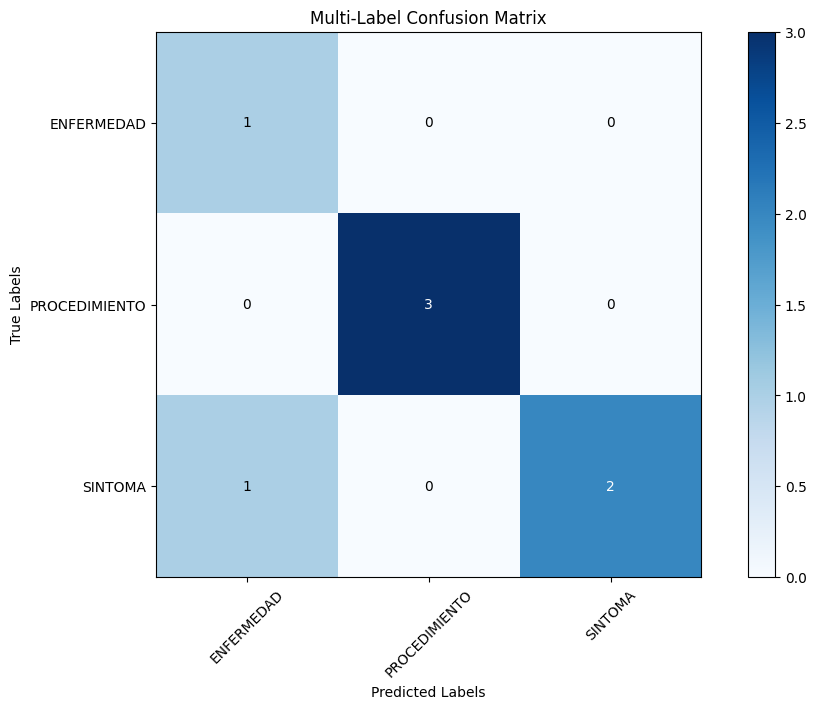

{'f1': 0.6, 'accuracy': 0.46153846153846156, 'Classes with no given label': {'ENFERMEDAD': 2, 'PROCEDIMIENTO': 1, 'SINTOMA': 3}}
Using extractor12:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='setfit', class='[]')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization method='setfit', class='[]')>, <Keyword(text='cara', span='[125, 128]', extraction method='textrank', score='0.11500542137973947', categorization method='setfit', class='[]')>, <Keyword(text='hiperostosis', span='[109, 120]', extraction method='textrank', score='0.11224054915569068', categorization method='setfit', class='['ENFERMEDAD']')>, <Keyword(text='próstata transrrectal', span='[157, 177]', extraction method='textrank', score='0.1019655834216719', categorization method='setfit', class='[]')>, <Keyword(text='tamaño', span='[57, 62]', extraction method='text

In [9]:
#training setfit classifier printing mcm and classification_report during evaluation
extractor13 = TermExtractor(extraction_methods=["textrank"],categorization_method="setfit")
extractor13.train_classifier(trainX,trainY,testX,testY, mcm=True, classification_report=True)
extractor13(text)
print("Using extractor12:\n", extractor13.keywords)

##### Training the Clustering model
As explained before, the clustering model is automatically trained with the data intended for prediction. However, the clustering model can also be trained with another set of data by calling the `train_clustering` function, which can be accessed by dot indexing after the initialization of the `TermExtractor` object. This function accepts the following parameters:
- `trainX` (list): List of training data (mentions).
- `kwargs`: Additional keyword arguments.

Of which `trainX` must always be provided. In this case the trained model will also be saved to "./trained_model" (or the specified `output_path`) and up to 5 mentions of each clusters will be printed as examples.

An example is shown below:

In [11]:
#training clustering with default parameters and 4 clusters
extractor14 = TermExtractor(extraction_methods=["textrank"], categorization_method="clustering", n_clusters=4)
extractor14.train_clustering(trainX)
extractor14(text)
print("Using extractor14:\n", extractor14.keywords)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'Class 0': ['retinotoxicidad por vigabatrina', 'MAVD', 'sangrado', 'inestabilidad a la marcha', 'herida inguinal'], 'Class 1': ['exploración física', 'biopsia de médula ósea', 'lipoma paratesticular, se practicó una excisión inguinal izquierda'], 'Class 2': ['metástasis ganglionares retroperitoneales', 'ferritina y saturación de transferan normales', 'ganglios linfáticos, siendo los 25 negativos para células tumorales', 'poliartrosis', 'teste derecho de características normales'], 'Class 3': ['RM craneal', 'Doppler de arterias renales y el ecocardiograma no mostraron alteraciones', 'miopización e hipertensión ocular por cierre angular agudo secundarios al tratamiento con topiramato']}
Using extractor14:
 [<Keyword(text='patrón permeativo', span='[89, 105]', extraction method='textrank', score='0.14330738384796365', categorization method='clustering', class='2')>, <Keyword(text='hueso esfenoides', span='[68, 83]', extraction method='textrank', score='0.133069733141935', categorization 

# REVISAR: ES UN TEXTO CON EL QUE LOS RESULTADOS SALEN MUY BIEN

In [24]:
extractor4 = TermExtractor(extraction_methods=["keybert","textrank"], join=True, pos=True, max_tokens=4)

No sentence-transformers model found with name /mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_parents_1epoch. Creating a new one with MEAN pooling.
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org

In [25]:
text = """Acude al Servicio de Urgencias por cefalea frontoparietal derecha.
Mediante biopsia se diagnostica adenocarcinoma de próstata Gleason 4+4=8 con metástasis óseas múltiples.
Se trata con Ácido Zoledrónico 4 mg iv/4 semanas.
"""

extractor4(text)
print(extractor4.keywords)

[<Keyword(text='iv/4 semanas', span='[208, 220]', extraction method='textrank', score='0.17250204821754367', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='Gleason 4', span='[126, 135]', extraction method='textrank', score='0.07649540044329659', categorization method='setfit', class='['MORFOLOGIA_NEOPLASIA']')>, <Keyword(text='biopsia', span='[76, 83]', extraction method='textrank', score='0.06720187190233769', categorization method='setfit', class='['PROCEDIMIENTO']')>, <Keyword(text='Servicio de Urgencias', span='[9, 30]', extraction method='textrank', score='0.05751819773048713', categorization method='setfit', class='['DEPARTAMENTO']')>, <Keyword(text='Ácido Zoledrónico 4', span='[185, 204]', extraction method='textrank', score='0.05751819773048713', categorization method='setfit', class='['FARMACO']')>, <Keyword(text='Mediante', span='[67, 75]', extraction method='textrank', score='0.0', categorization method='setfit', class='['NO_CATEGORY']')>, <Keywo

In [35]:
extractor4 = TermExtractor(extraction_methods=["textrank","rake"], join=True, max_tokens=3)

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [36]:
text2 = """Entre sus antecedentes médicos destacaba padecer una esclerosis tuberosa y haber sido sometido a un trasplante de riñón tras sufrir una nefrectomía por un angiomiolipoma renal. 
Presentaba como síntomas de la enfermedad el denominado adenoma sebáceo de Pringle a nivel nasogeniano, hamartomas retinianos en el fondo de ojo y lesiones fibróticas a nivel cervical posterior.
"""

extractor4(text2)
for k in extractor4.keywords:
    if "ENFERMEDAD" in k.label:
        print(k)

<Keyword(text='riñón tras sufrir', span='[114, 131]', extraction method='rake', score='9.0', categorization method='setfit', class='['ENFERMEDAD']')>
<Keyword(text='denominado adenoma sebáceo', span='[223, 249]', extraction method='rake', score='9.0', categorization method='setfit', class='['ENFERMEDAD']')>
<Keyword(text='lesiones fibróticas', span='[325, 344]', extraction method='rake', score='4.0', categorization method='setfit', class='['ENFERMEDAD']')>
<Keyword(text='hamartomas retinianos', span='[282, 303]', extraction method='rake', score='4.0', categorization method='setfit', class='['ENFERMEDAD']')>
<Keyword(text='angiomiolipoma renal', span='[155, 175]', extraction method='textrank', score='0.08534231556497231', categorization method='setfit', class='['ENFERMEDAD']')>
<Keyword(text='esclerosis tuberosa', span='[53, 72]', extraction method='textrank', score='0.054441557760609355', categorization method='setfit', class='['ENFERMEDAD']')>
<Keyword(text='enfermedad', span='[209, 2